In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
football = pd.read_csv("data/deflategate.csv")
football.head()

,Team,Blakeman,Prioleau
0,Patriots,11.50,11.80
1,Patriots,10.85,11.20
2,Patriots,11.15,11.50
3,Patriots,10.70,11.00
4,Patriots,11.10,11.45


In [15]:
patriots_starts = 12.5 * np.ones(11)
colts_starts = 13 * np.ones(4)
start_vals = np.append(patriots_starts, colts_starts)
start_vals

array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

In [16]:
football["Pressure Drop"] = start_vals - (football["Blakeman"] + football["Prioleau"])/2
football.head()

,Team,Blakeman,Prioleau,Pressure Drop
0,Patriots,11.50,11.80,0.850
1,Patriots,10.85,11.20,1.475
2,Patriots,11.15,11.50,1.175
3,Patriots,10.70,11.00,1.650
4,Patriots,11.10,11.45,1.225


In [17]:
grouped = football.groupby("Team")
grouped["Pressure Drop"].mean()

Team
Colts       0.468750
Patriots    1.202273
Name: Pressure Drop, dtype: float64

In [18]:
football.drop(["Blakeman", "Prioleau"], axis=1, inplace=True)
football

,Team,Pressure Drop
0,Patriots,0.850
1,Patriots,1.475
2,Patriots,1.175
3,Patriots,1.650
4,Patriots,1.225
5,Patriots,0.725
6,Patriots,0.425
7,Patriots,1.175
8,Patriots,1.350
9,Patriots,1.800


In [19]:
observed_difference = grouped["Pressure Drop"].mean()[1] - grouped["Pressure Drop"].mean()[0]
observed_difference

0.733522727272728

In [20]:
differences = []
simulations = 5000
for i in range(simulations):
    shuffled = football.sample(15, replace=False)
    shuffled_teams = shuffled["Team"]
    original_and_shuffled = football.assign(Shuffled_Teams=shuffled_teams.values)
    mean_ = original_and_shuffled.groupby("Shuffled_Teams")
    difference = mean_["Pressure Drop"].mean()[1] - mean_["Pressure Drop"].mean()[0]
    differences.append(difference)

In [21]:
differences

[-0.2721590909090905,
 0.44374999999999964,
 -0.16988636363636234,
 0.6227272727272737,
 0.20511363636363633,
 -0.1272727272727272,
 -0.5193181818181819,
 0.40965909090909003,
 -0.45965909090909074,
 -0.4085227272727282,
 0.2562500000000001,
 -0.7068181818181821,
 -0.07613636363636345,
 -0.144318181818182,
 0.10284090909090948,
 -0.510795454545455,
 -0.10170454545454566,
 0.10284090909090882,
 -0.059090909090909305,
 -0.13579545454545405,
 0.3159090909090907,
 0.17102272727272738,
 -0.17840909090909096,
 -0.11022727272727362,
 0.4096590909090907,
 0.06874999999999987,
 0.40965909090909136,
 -0.06761363636363671,
 0.16249999999999987,
 0.13693181818181843,
 -0.3573863636363638,
 -0.1102272727272724,
 -0.0846590909090903,
 -0.25511363636363693,
 0.42670454545454617,
 -0.15284090909090942,
 0.37556818181818175,
 0.03465909090909092,
 0.34999999999999964,
 -0.05909090909090864,
 0.03465909090909136,
 0.03465909090909025,
 -0.29772727272727273,
 -0.15284090909090997,
 0.2732954545454549,
 0

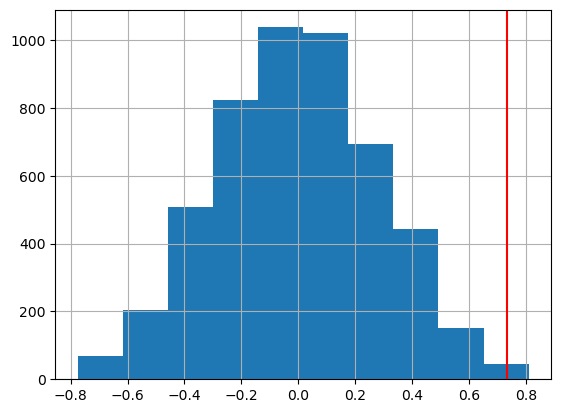

In [22]:
plt.hist(differences)
plt.grid(True)
plt.axvline(observed_difference, 0, color="red")
plt.show()

In [23]:
p_value = sum(observed_difference <= differences)/len(differences)
p_value

0.003